In [1]:
import numpy as np

### Data

In [3]:
import sklearn
from pgmpy.utils import get_example_model

In [4]:
dataset_name = "insurance"

In [5]:
ground_bn = get_example_model(dataset_name)

dataset = ground_bn.simulate(n_samples = 10000)

  0%|          | 0/27 [00:00<?, ?it/s]

In [6]:
dataset.columns

Index(['Airbag', 'PropCost', 'Antilock', 'ThisCarCost', 'MedCost', 'Age',
       'OtherCar', 'Accident', 'Cushioning', 'SeniorTrain', 'DrivHist',
       'Theft', 'DrivingSkill', 'RiskAversion', 'ThisCarDam', 'DrivQuality',
       'VehicleYear', 'GoodStudent', 'Mileage', 'RuggedAuto', 'OtherCarCost',
       'ILiCost', 'AntiTheft', 'SocioEcon', 'MakeModel', 'CarValue',
       'HomeBase'],
      dtype='object')

In [7]:
target_name = 'Accident'
feature_names = list(dataset.drop(target_name, axis = 1).columns)
variables = list(dataset.columns)

In [8]:
X = dataset.drop(target_name, axis = 1).to_numpy()
y = dataset[target_name].to_numpy()

In [9]:
feature_encoder = sklearn.preprocessing.OrdinalEncoder()
feature_encoder.fit(X)

target_encoder = sklearn.preprocessing.LabelEncoder()
target_encoder.fit(y.squeeze())

X = feature_encoder.transform(X)
y = target_encoder.transform(y)

In [10]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y.squeeze(), test_size = 0.2, random_state = 51)

### Model

In [11]:
from tensorflow import keras

2025-11-12 05:18:48.895753: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
def build_model(input_shape, classes, n_layers = 5, n_nodes_l = 2, n_nodes_u = 10, optimizer = 'adam', learning_rate = 0.001):

    '''
    Dynamically creates fully-connected neural network given hyperparameters.
    '''
    
    model = keras.Sequential()
    model.add(keras.Input(shape = (input_shape,)))
    for i in range(n_layers):
        model.add(keras.layers.Dense(np.random.choice([i for i in range(n_nodes_l, n_nodes_u)]), activation = np.random.choice(['relu', 'sigmoid'])))
    model.add(keras.layers.Dense(classes, activation = 'softmax'))

    if optimizer == 'sgd':
        optim = keras.optimizers.SGD(learning_rate = learning_rate)
    elif optimizer == 'adam':
        optim = keras.optimizers.Adam(learning_rate = learning_rate)
    
    model.compile(optimizer = optim, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [13]:
n_classes = len(np.unique(y_train))
input_shape = len(X_train[0])
n_layers = 5
n_nodes_l = 5
n_nodes_u = 25
optimizer = 'adam'
learning_rate = 0.01
epochs = 25
batch_size = 100

In [14]:
model = build_model(
    input_shape,
    n_classes,
    n_layers = n_layers, 
    n_nodes_l = n_nodes_l,
    n_nodes_u = n_nodes_u, 
    optimizer = optimizer, 
    learning_rate = learning_rate
)

model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2)
model.summary()

Epoch 1/25


2025-11-12 05:18:50.708504: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6739 - loss: 0.9642 - val_accuracy: 0.8138 - val_loss: 0.4956
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8391 - loss: 0.4017 - val_accuracy: 0.8600 - val_loss: 0.3151
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8956 - loss: 0.2885 - val_accuracy: 0.9262 - val_loss: 0.2268
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9237 - loss: 0.2267 - val_accuracy: 0.9269 - val_loss: 0.2002
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9319 - loss: 0.2105 - val_accuracy: 0.9344 - val_loss: 0.1858
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9328 - loss: 0.2009 - val_accuracy: 0.9375 - val_loss: 0.1989
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9352 - loss: 0.1978 - val_accuracy: 0.9381 - val_loss: 0.1784
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9389 - loss: 0.1840 - val_accuracy: 0.9400 - val_loss: 0.1773
Epo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 22)             │           594 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           253 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 22)             │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │           207 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │            70 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            32 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,262 (16.65 KB)

 Trainable params: 1,420 (5.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,842 (11.11 KB)

In [16]:
y_pred = model(X_test)
y_pred = np.argmax(y_pred, axis = 1)

mlp_accuracy = sklearn.metrics.accuracy_score(y_pred, y_test)
print(f"Test Accuracy: {mlp_accuracy:.4f}")

Test Accuracy: 0.9440


#### Explanations

In [39]:
import os
import json
from modules.method import Method
from modules.metrics import markov_blanket, structure_metrics, distribution_drift, average_distribution_drift, divergence_plot, fidelity_plot

In [40]:
results = []
experiment_name = os.path.join("./data/results", dataset_name)
ground_mb = markov_blanket(ground_bn, target_name)
n_trials = 100

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', 'Mileage': 'C', 'RuggedAuto': 'C', 'OtherCarCost': 'C', 'ILiCost': 'C', 'AntiTheft': 'C', 'SocioEcon': 'C', 'MakeModel': 'C', 'CarValue': 'C', 'HomeBase': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', '

  0%|          | 0/1000000 [00:00<?, ?it/s]

= = = = = = = = = = MARKOV BLANKET RETRIEVAL RESULTS = = = = = = = = = =
Precision: 0.3333333333333333 | Recall: 0.3333333333333333 | F1: 0.3333333333333333 | Accuracy: 0.8106508875739645
Confusion Matrix: 
[[129  16]
 [ 16   8]]

= = = = = = = = = = FIDELITY TO MODEL = = = = = = = = = =
No Features Divergence: 0.07615589377090866
Method MB Features Divergence: 0.0035716122001972304
Ground MB Features Divergence: 0.0007590077996482654
Outside Ground MB Featues Divergence: 0.2536400400601672
Outside Method MB Features Divergence: 0.5832468707268135


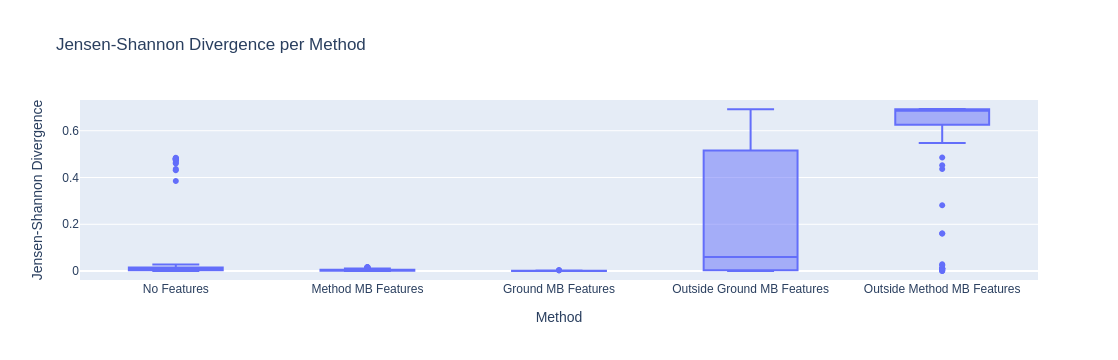

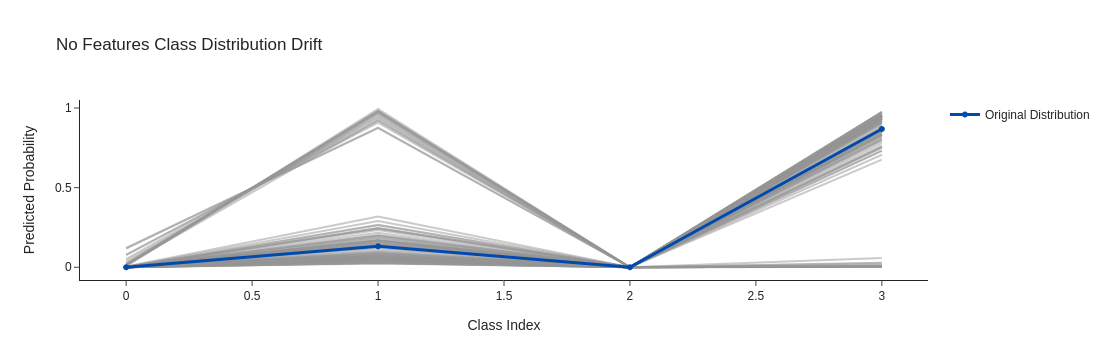

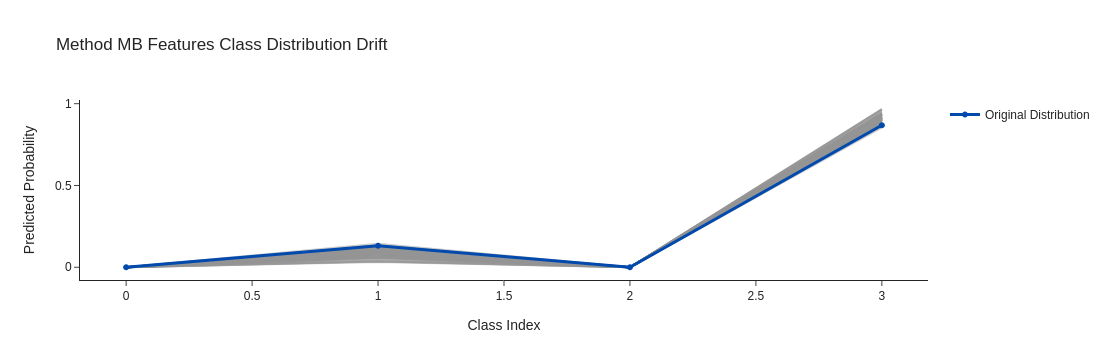

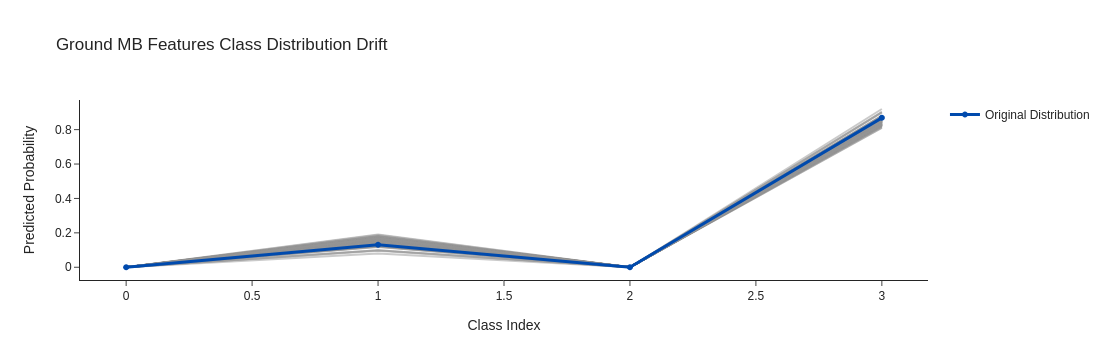

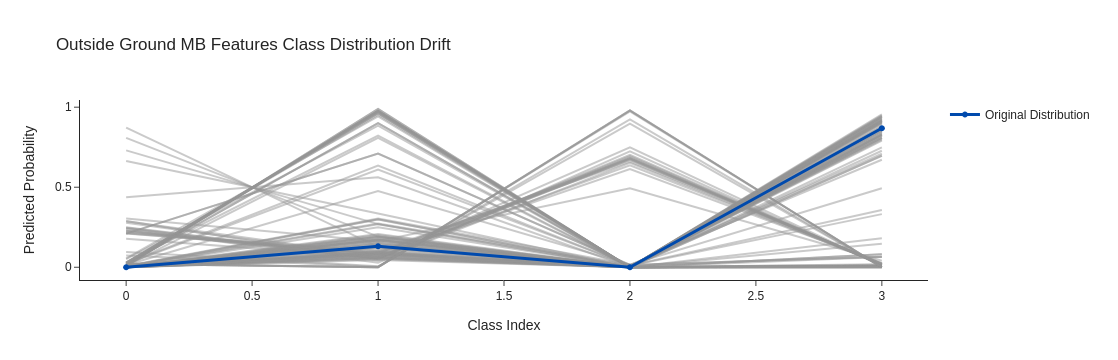

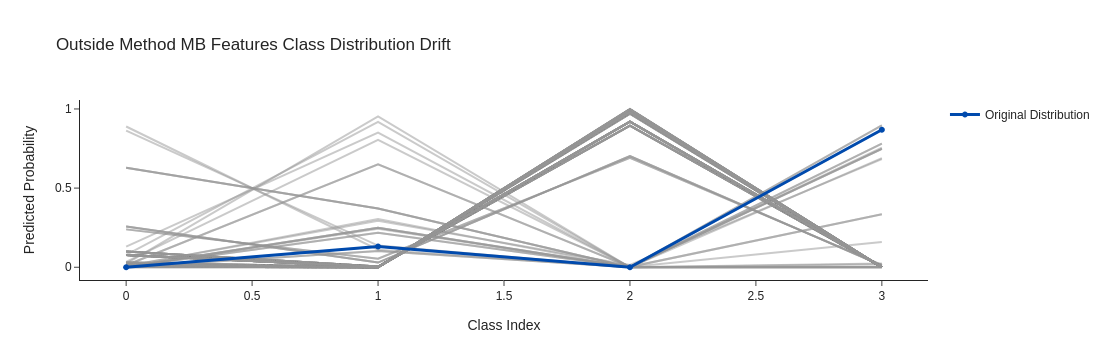

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', 'Mileage': 'C', 'RuggedAuto': 'C', 'OtherCarCost': 'C', 'ILiCost': 'C', 'AntiTheft': 'C', 'SocioEcon': 'C', 'MakeModel': 'C', 'CarValue': 'C', 'HomeBase': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', '

  0%|          | 0/1000000 [00:00<?, ?it/s]

= = = = = = = = = = MARKOV BLANKET RETRIEVAL RESULTS = = = = = = = = = =
Precision: 0.2857142857142857 | Recall: 0.5 | F1: 0.36363636363636365 | Accuracy: 0.8133333333333334
Confusion Matrix: 
[[171  30]
 [ 12  12]]

= = = = = = = = = = FIDELITY TO MODEL = = = = = = = = = =
No Features Divergence: 0.6924018965112598
Method MB Features Divergence: 0.002729126233752474
Ground MB Features Divergence: 0.00010746719946476838
Outside Ground MB Featues Divergence: 0.008106194643116724
Outside Method MB Features Divergence: 0.15894257462470254


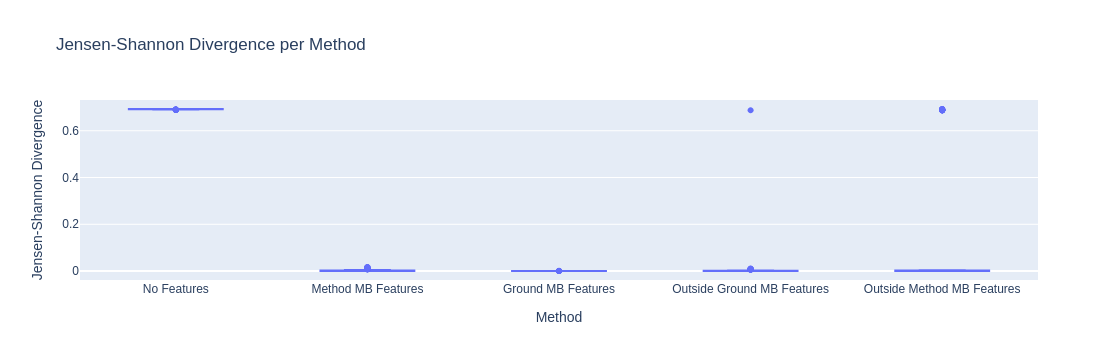

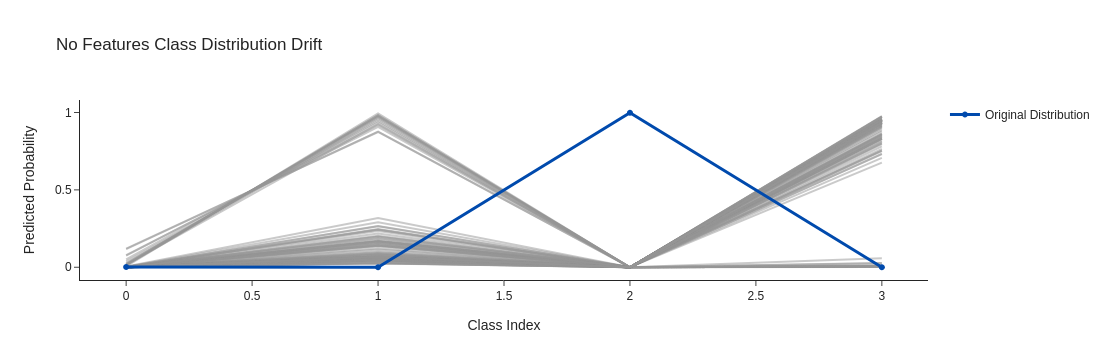

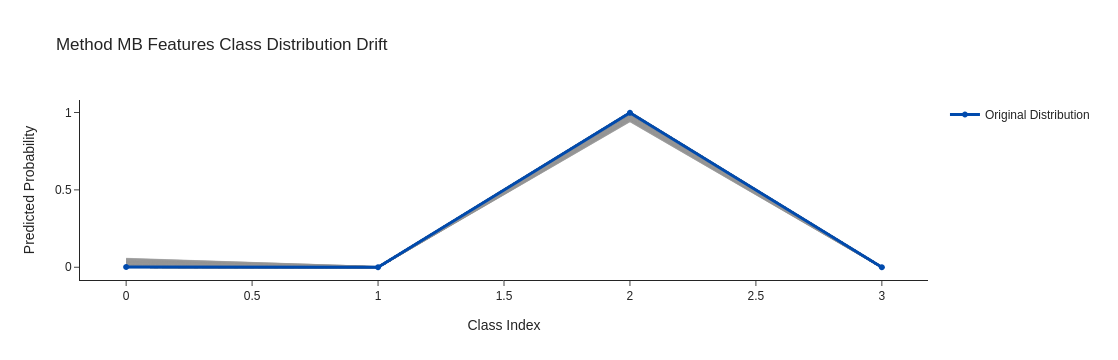

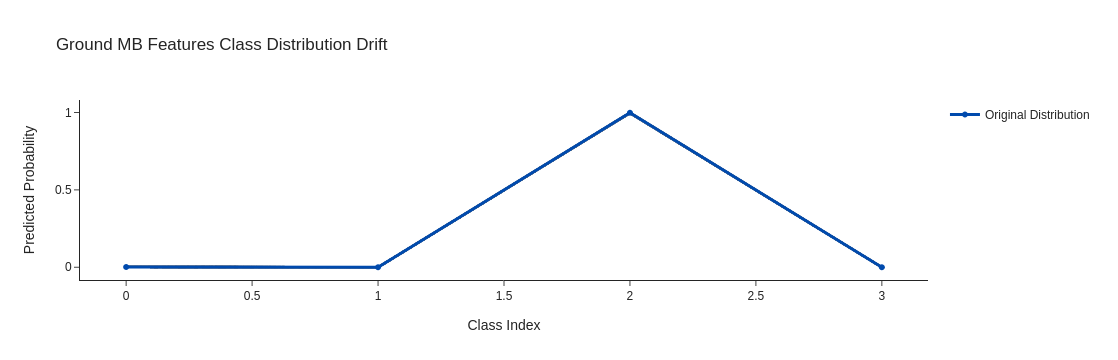

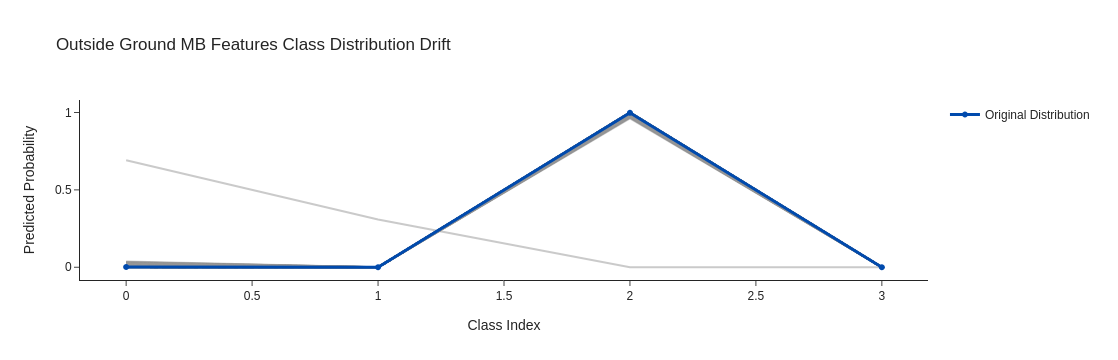

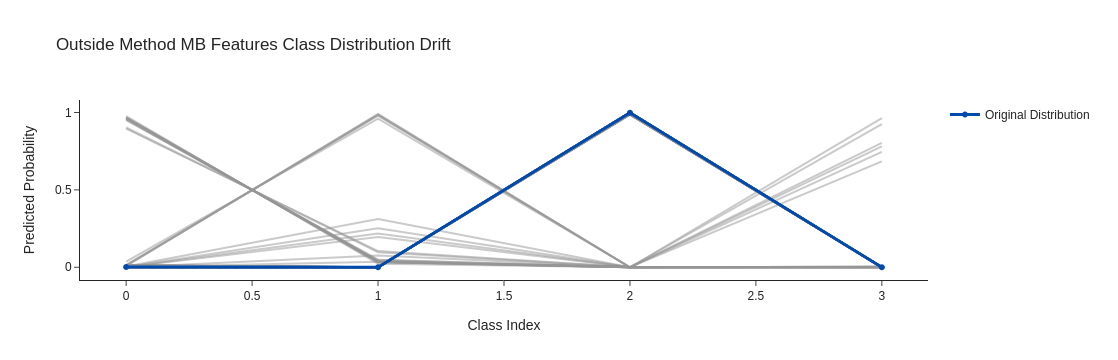

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', 'Mileage': 'C', 'RuggedAuto': 'C', 'OtherCarCost': 'C', 'ILiCost': 'C', 'AntiTheft': 'C', 'SocioEcon': 'C', 'MakeModel': 'C', 'CarValue': 'C', 'HomeBase': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', '

  0%|          | 0/1000000 [00:00<?, ?it/s]

= = = = = = = = = = MARKOV BLANKET RETRIEVAL RESULTS = = = = = = = = = =
Precision: 0.26666666666666666 | Recall: 0.3333333333333333 | F1: 0.2962962962962963 | Accuracy: 0.7361111111111112
Confusion Matrix: 
[[98 22]
 [16  8]]

= = = = = = = = = = FIDELITY TO MODEL = = = = = = = = = =
No Features Divergence: 0.4305199649070198
Method MB Features Divergence: 0.003006543804941683
Ground MB Features Divergence: 0.0008442118072558055
Outside Ground MB Featues Divergence: 0.406152529165571
Outside Method MB Features Divergence: 0.44410269671498603


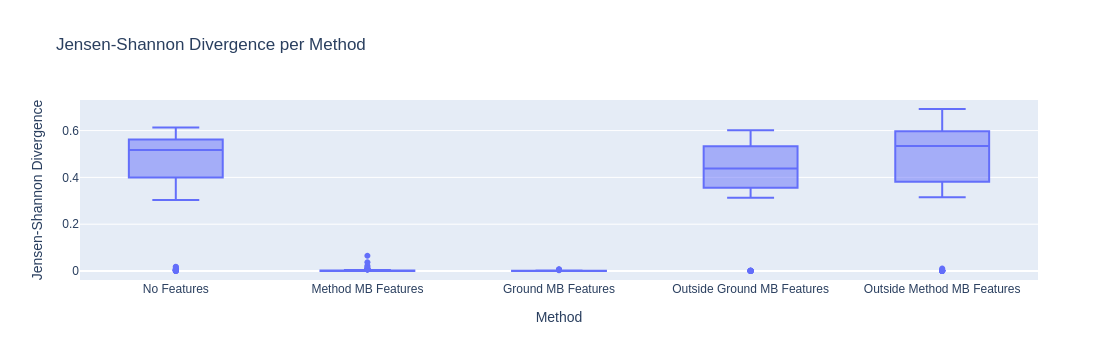

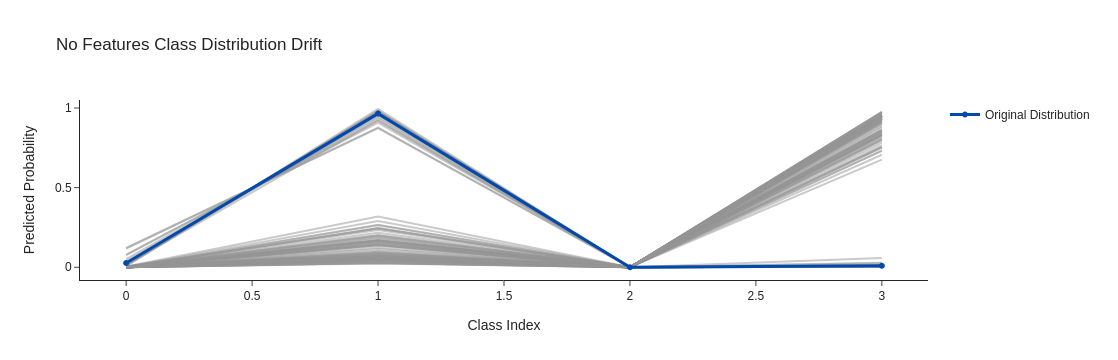

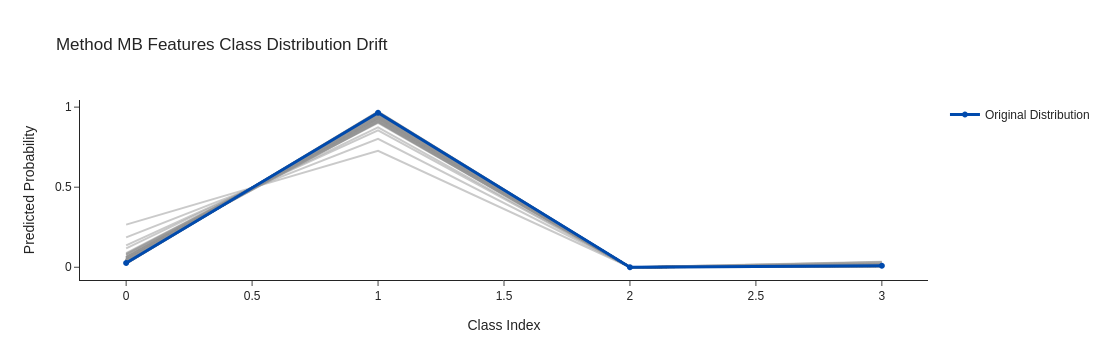

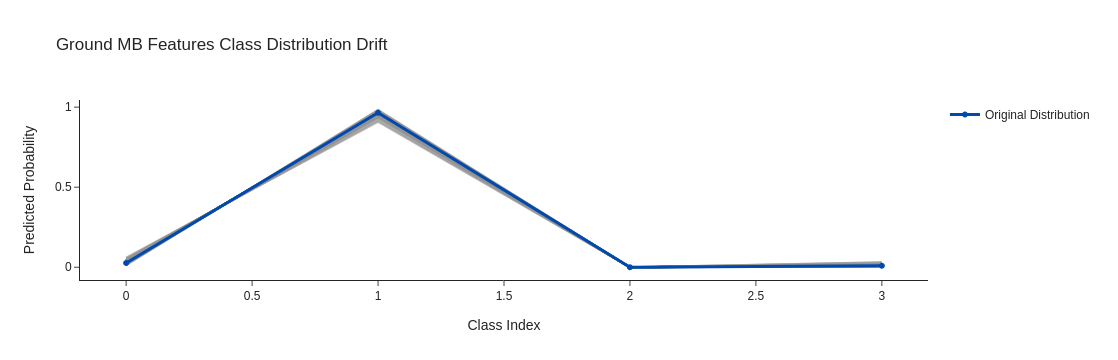

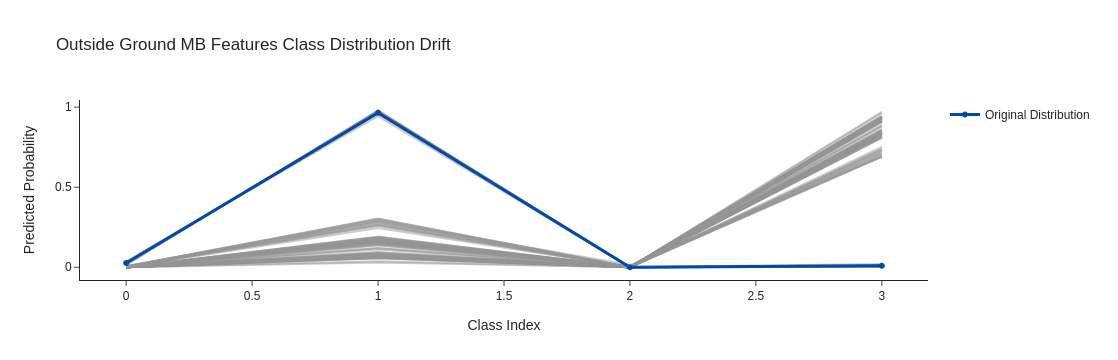

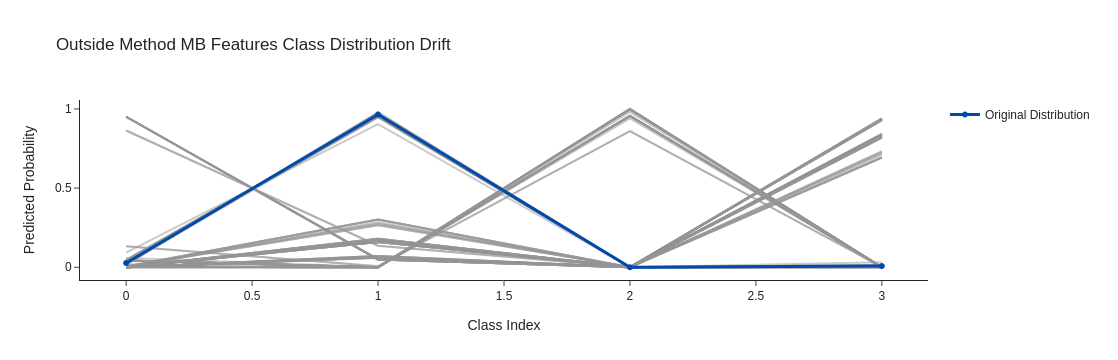

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', 'Mileage': 'C', 'RuggedAuto': 'C', 'OtherCarCost': 'C', 'ILiCost': 'C', 'AntiTheft': 'C', 'SocioEcon': 'C', 'MakeModel': 'C', 'CarValue': 'C', 'HomeBase': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', '

  0%|          | 0/1000000 [00:00<?, ?it/s]

= = = = = = = = = = MARKOV BLANKET RETRIEVAL RESULTS = = = = = = = = = =
Precision: 0.2413793103448276 | Recall: 0.5833333333333334 | F1: 0.34146341463414637 | Accuracy: 0.8131487889273357
Confusion Matrix: 
[[221  44]
 [ 10  14]]

= = = = = = = = = = FIDELITY TO MODEL = = = = = = = = = =
No Features Divergence: 0.6927286668695422
Method MB Features Divergence: 0.00010066137426195085
Ground MB Features Divergence: 5.044707461153619e-05
Outside Ground MB Featues Divergence: 0.062199723664176504
Outside Method MB Features Divergence: 0.2971104783167565


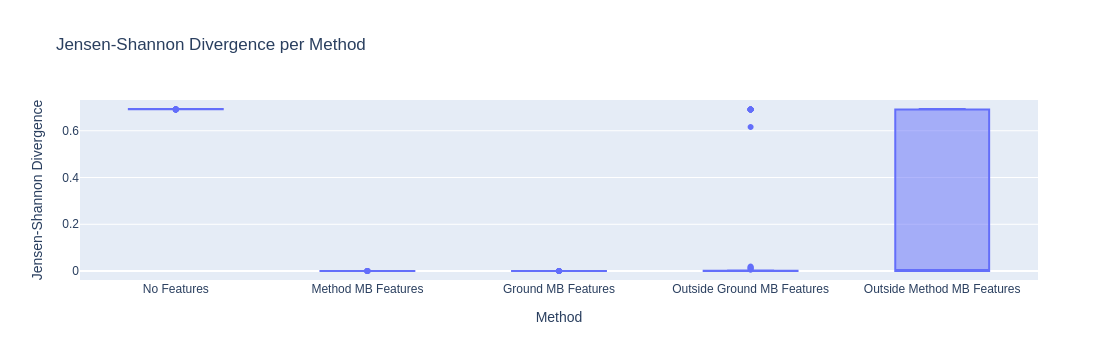

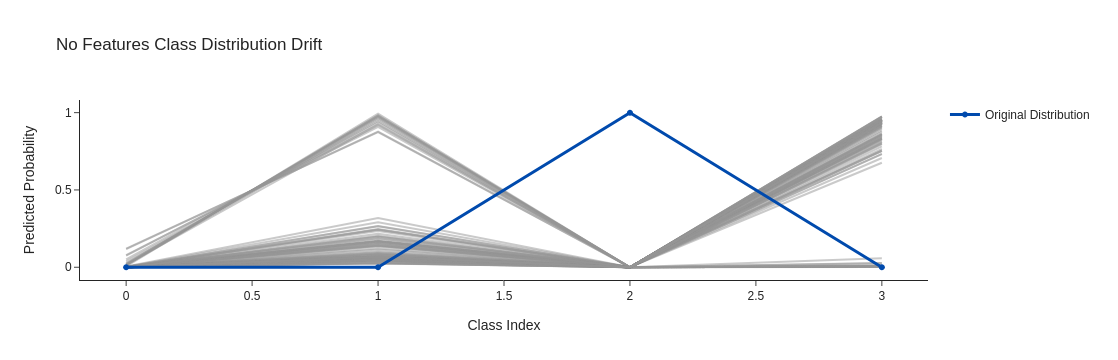

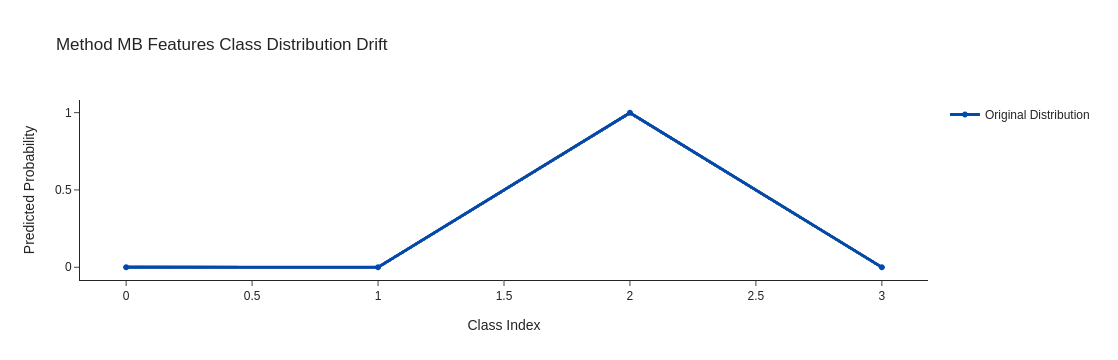

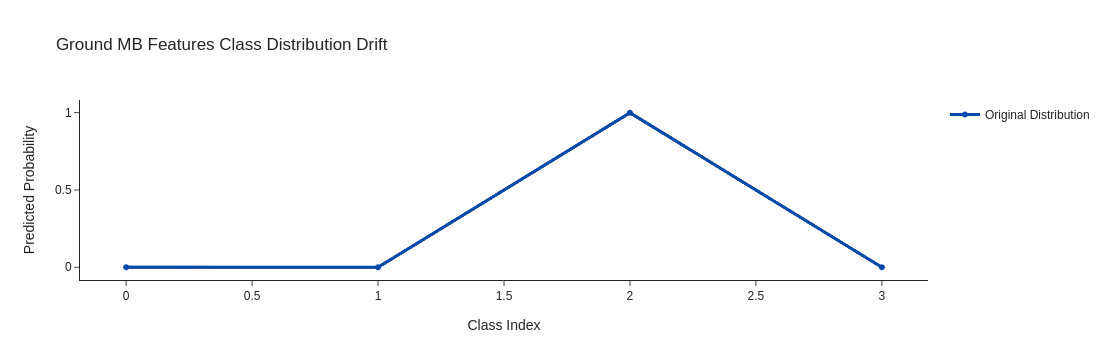

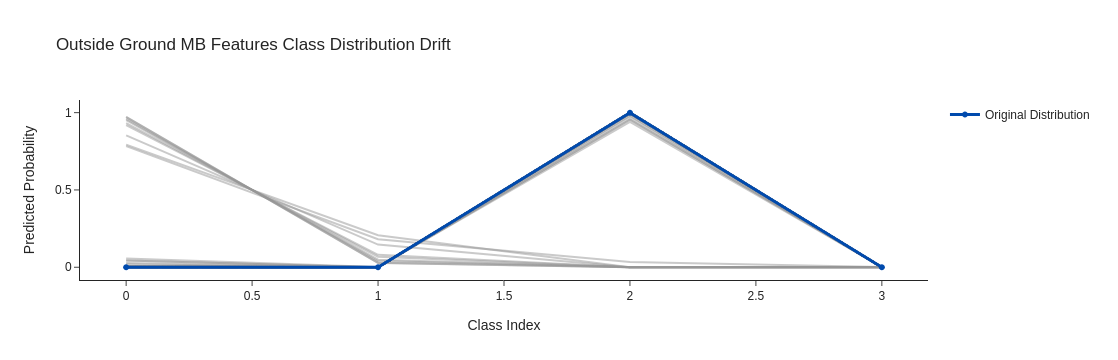

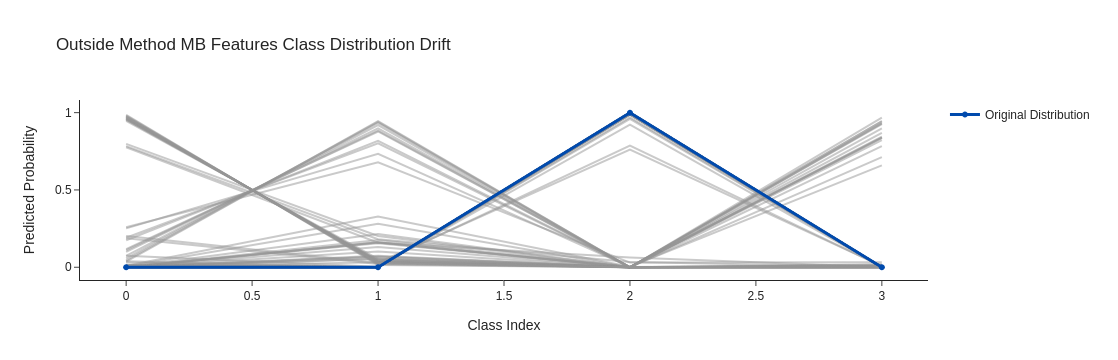

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', 'Mileage': 'C', 'RuggedAuto': 'C', 'OtherCarCost': 'C', 'ILiCost': 'C', 'AntiTheft': 'C', 'SocioEcon': 'C', 'MakeModel': 'C', 'CarValue': 'C', 'HomeBase': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', '

  0%|          | 0/1000000 [00:00<?, ?it/s]

= = = = = = = = = = MARKOV BLANKET RETRIEVAL RESULTS = = = = = = = = = =
Precision: 0.2777777777777778 | Recall: 0.4166666666666667 | F1: 0.3333333333333333 | Accuracy: 0.8222222222222222
Confusion Matrix: 
[[175  26]
 [ 14  10]]

= = = = = = = = = = FIDELITY TO MODEL = = = = = = = = = =
No Features Divergence: 0.6918297380370312
Method MB Features Divergence: 0.002483044098850039
Ground MB Features Divergence: 0.0010259403823872956
Outside Ground MB Featues Divergence: 0.02140173580053319
Outside Method MB Features Divergence: 0.10561742108998758


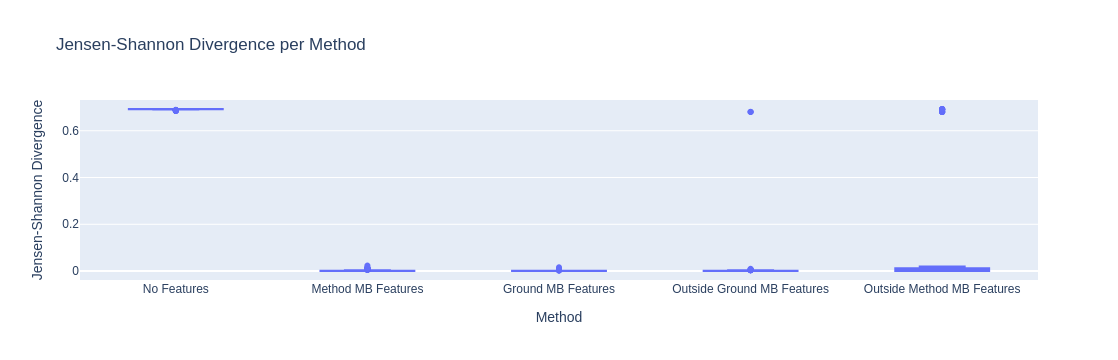

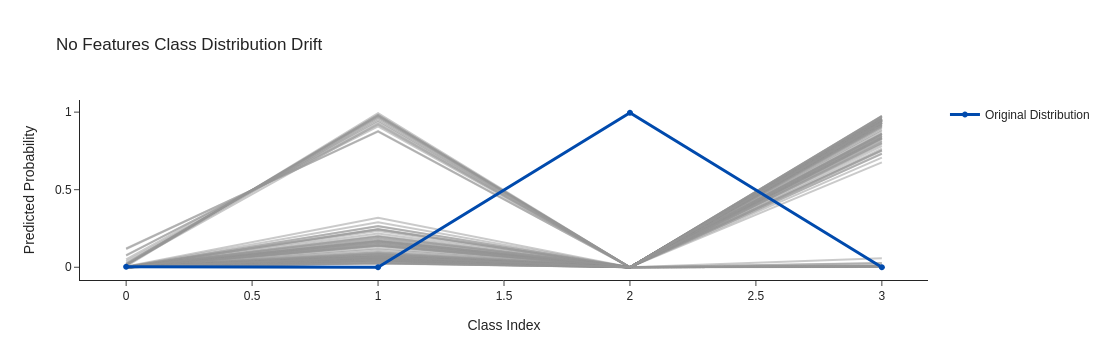

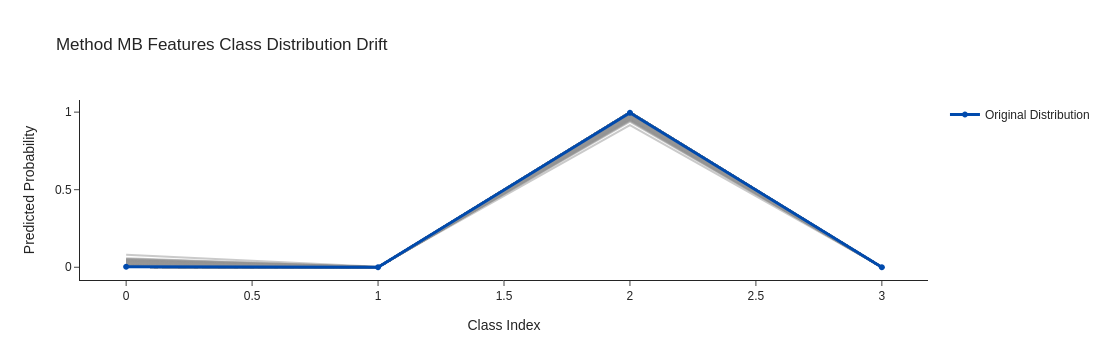

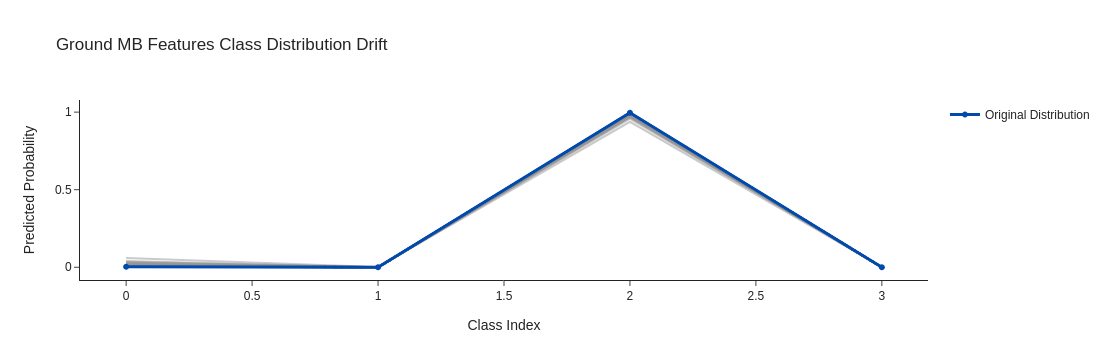

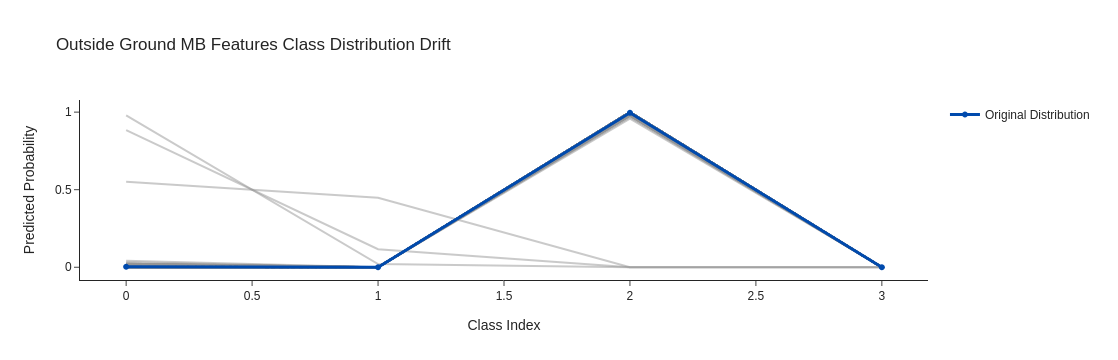

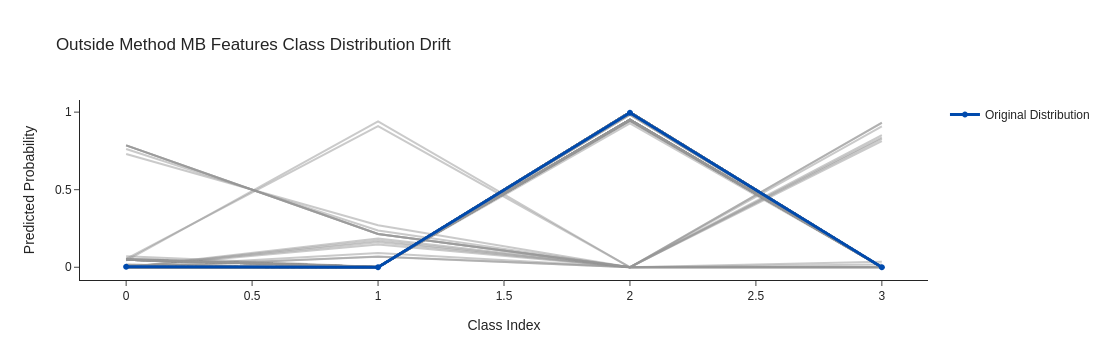

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', 'Mileage': 'C', 'RuggedAuto': 'C', 'OtherCarCost': 'C', 'ILiCost': 'C', 'AntiTheft': 'C', 'SocioEcon': 'C', 'MakeModel': 'C', 'CarValue': 'C', 'HomeBase': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', '

  0%|          | 0/1000000 [00:00<?, ?it/s]

= = = = = = = = = = MARKOV BLANKET RETRIEVAL RESULTS = = = = = = = = = =
Precision: 0.26666666666666666 | Recall: 0.3333333333333333 | F1: 0.2962962962962963 | Accuracy: 0.8311111111111111
Confusion Matrix: 
[[179  22]
 [ 16   8]]

= = = = = = = = = = FIDELITY TO MODEL = = = = = = = = = =
No Features Divergence: 0.6897904330170356
Method MB Features Divergence: 0.0030444190524045473
Ground MB Features Divergence: 0.0008195341657701477
Outside Ground MB Featues Divergence: 0.2717174983763357
Outside Method MB Features Divergence: 0.3916000051563103


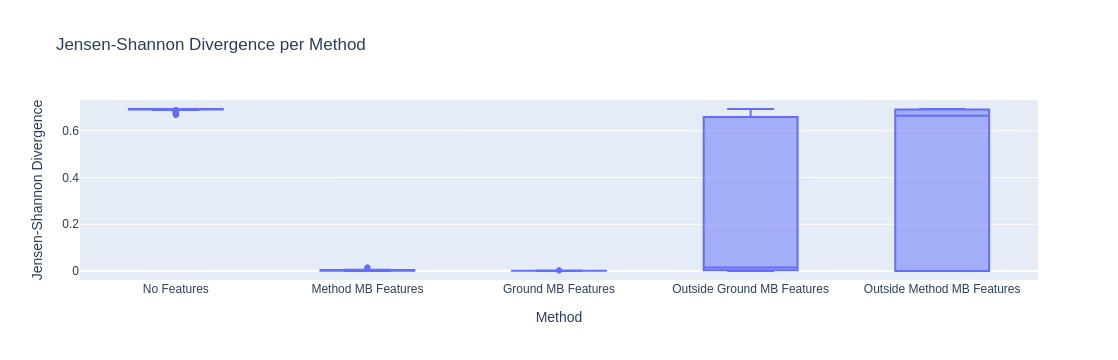

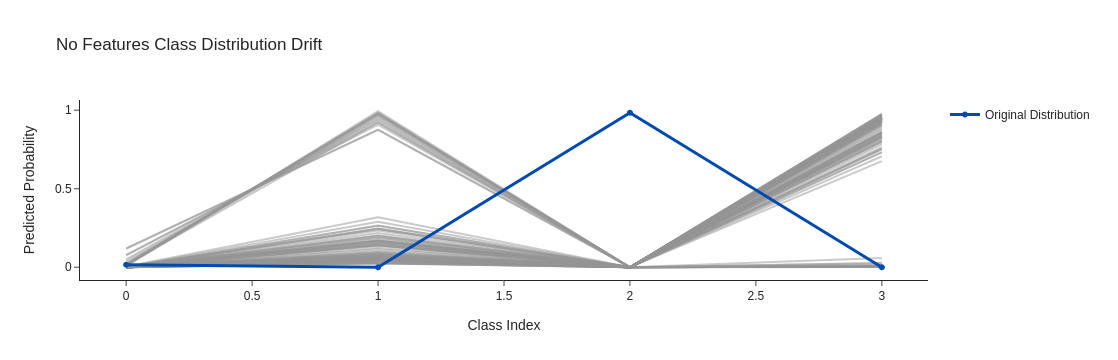

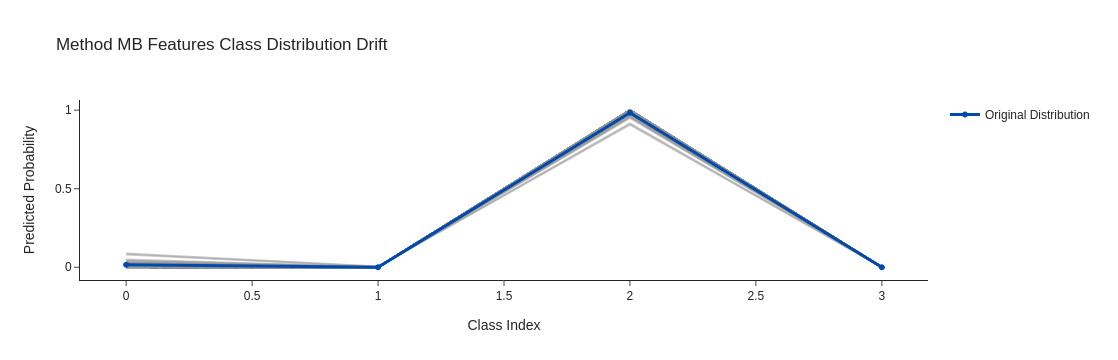

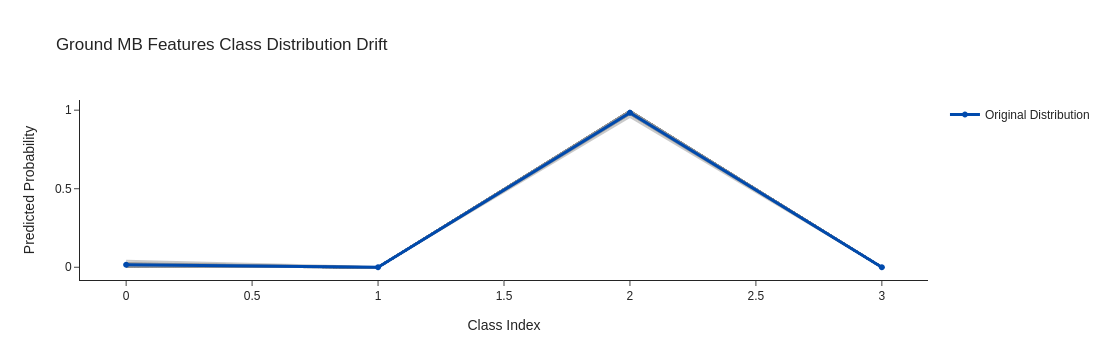

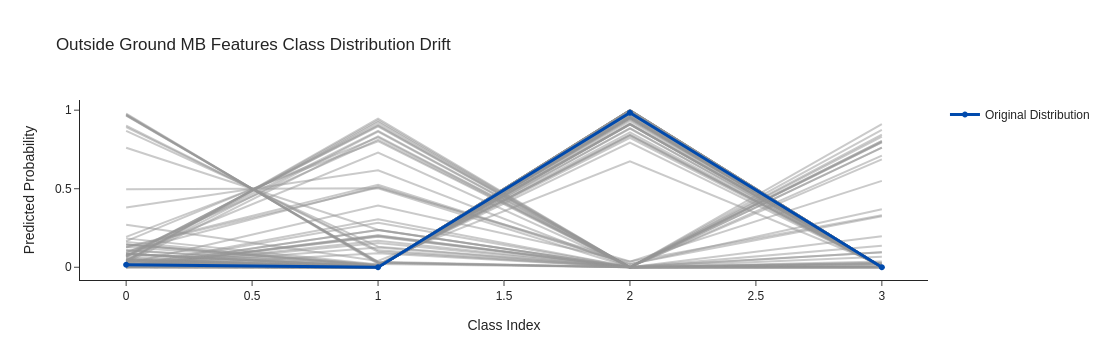

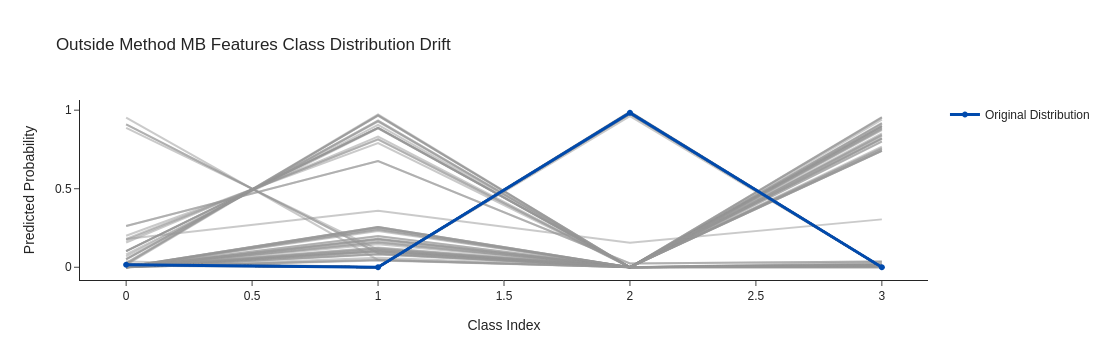

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', 'Mileage': 'C', 'RuggedAuto': 'C', 'OtherCarCost': 'C', 'ILiCost': 'C', 'AntiTheft': 'C', 'SocioEcon': 'C', 'MakeModel': 'C', 'CarValue': 'C', 'HomeBase': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', '

  0%|          | 0/1000000 [00:00<?, ?it/s]

= = = = = = = = = = MARKOV BLANKET RETRIEVAL RESULTS = = = = = = = = = =
Precision: 0.375 | Recall: 0.5 | F1: 0.42857142857142855 | Accuracy: 0.8106508875739645
Confusion Matrix: 
[[125  20]
 [ 12  12]]

= = = = = = = = = = FIDELITY TO MODEL = = = = = = = = = =
No Features Divergence: 0.6883679097012871
Method MB Features Divergence: 0.016329983403197898
Ground MB Features Divergence: 0.08281326441248607
Outside Ground MB Featues Divergence: 0.12010119522172596
Outside Method MB Features Divergence: 0.23764541425334634


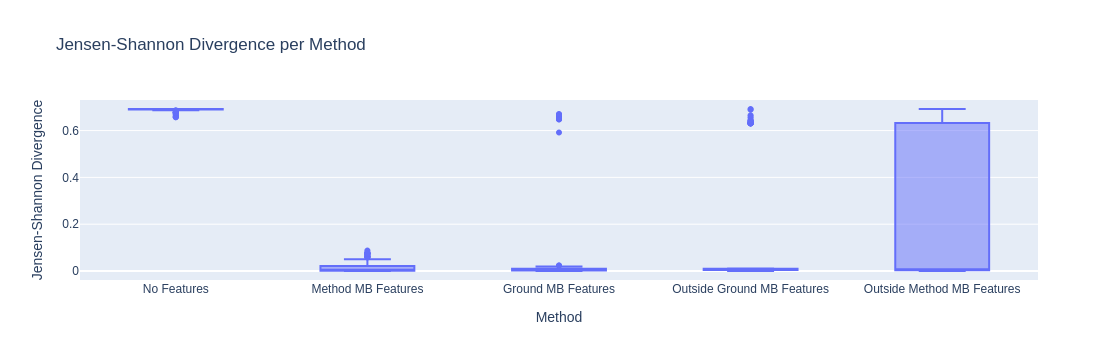

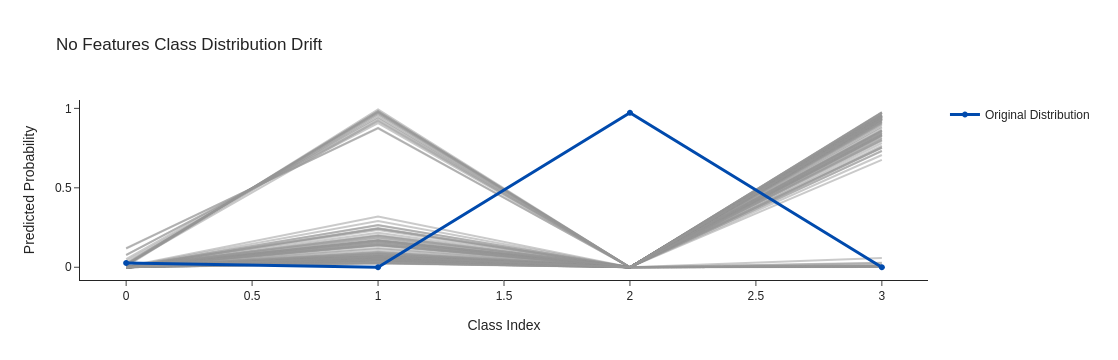

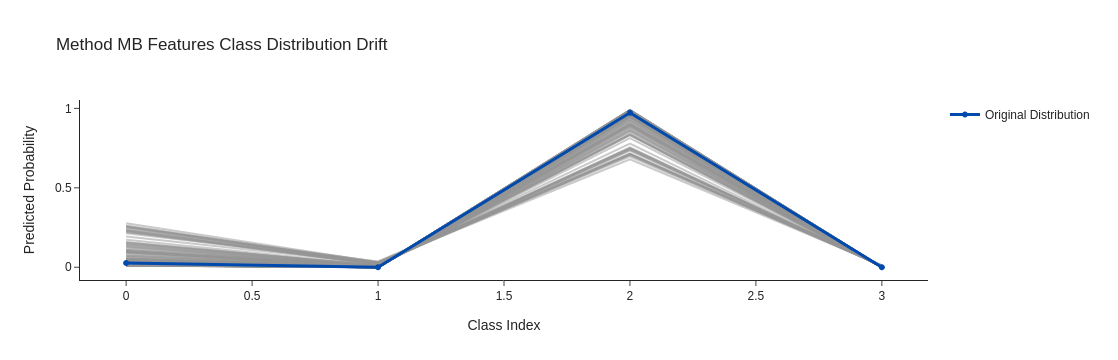

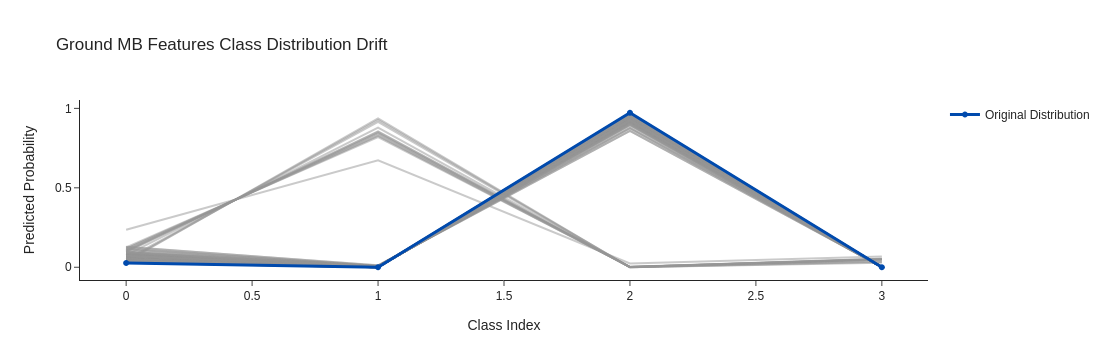

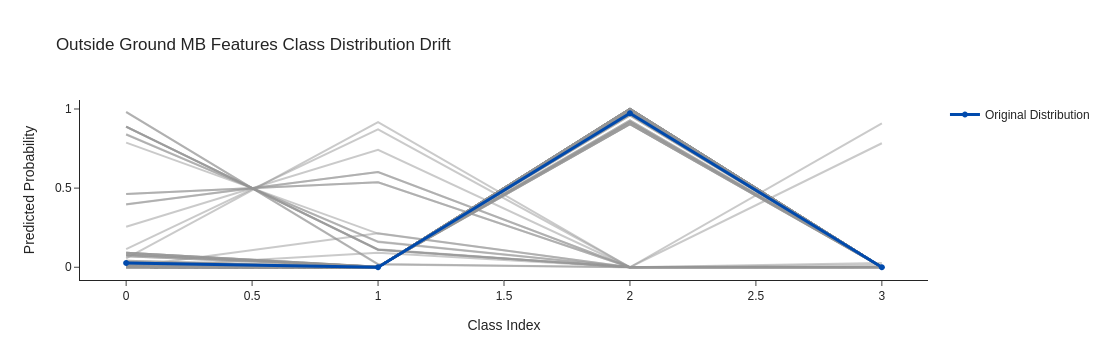

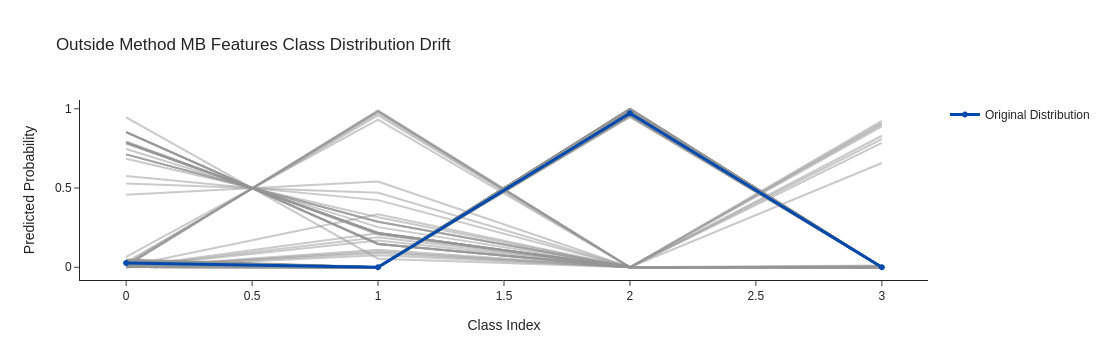

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', 'Mileage': 'C', 'RuggedAuto': 'C', 'OtherCarCost': 'C', 'ILiCost': 'C', 'AntiTheft': 'C', 'SocioEcon': 'C', 'MakeModel': 'C', 'CarValue': 'C', 'HomeBase': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', '

  0%|          | 0/1000000 [00:00<?, ?it/s]

= = = = = = = = = = MARKOV BLANKET RETRIEVAL RESULTS = = = = = = = = = =
Precision: 0.3333333333333333 | Recall: 0.16666666666666666 | F1: 0.2222222222222222 | Accuracy: 0.8055555555555556
Confusion Matrix: 
[[112   8]
 [ 20   4]]

= = = = = = = = = = FIDELITY TO MODEL = = = = = = = = = =
No Features Divergence: 0.42464687971875387
Method MB Features Divergence: 0.05341940661775022
Ground MB Features Divergence: 0.04024376129190395
Outside Ground MB Featues Divergence: 0.32383667348352607
Outside Method MB Features Divergence: 0.30647601286522563


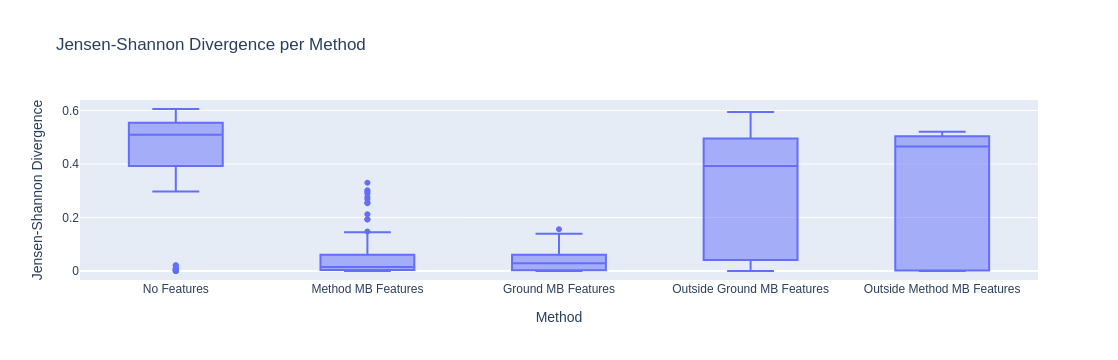

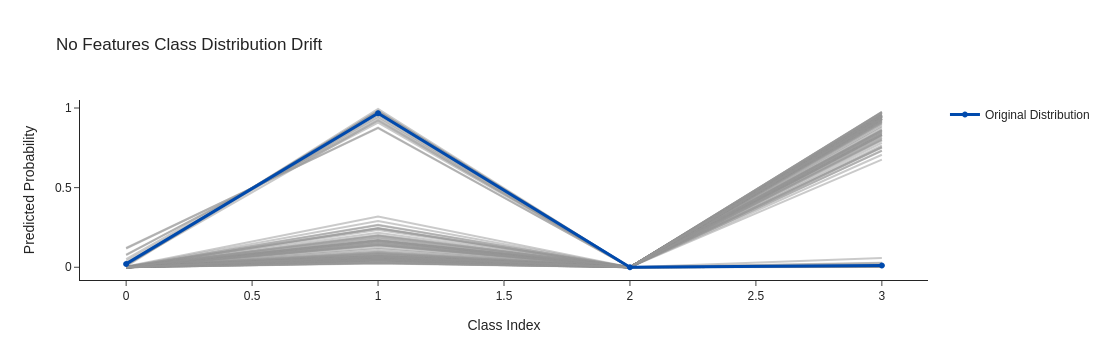

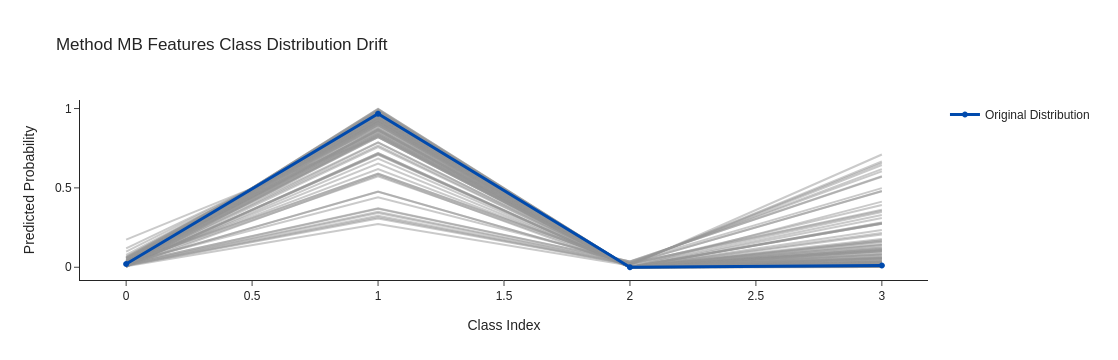

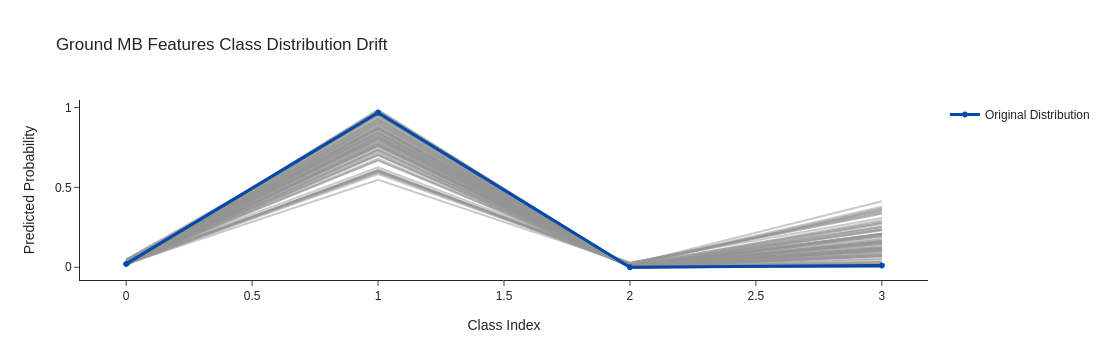

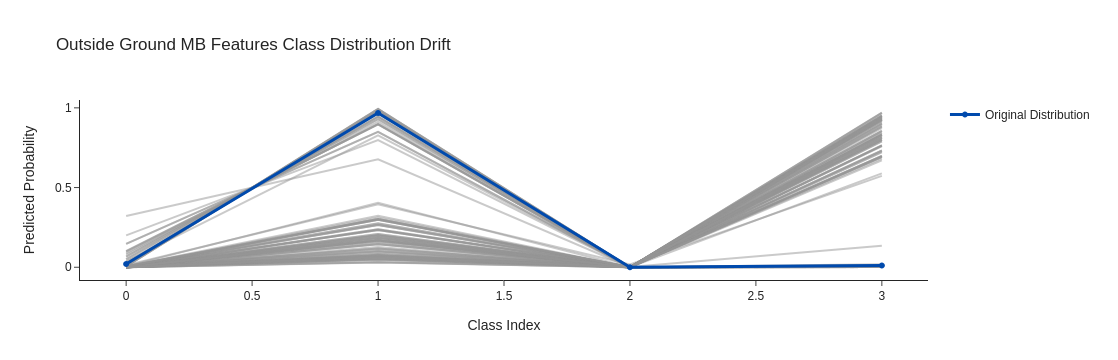

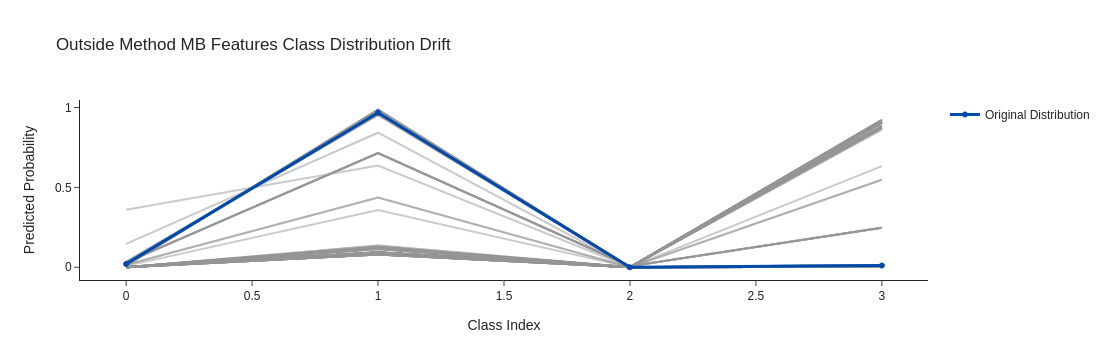

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', 'Mileage': 'C', 'RuggedAuto': 'C', 'OtherCarCost': 'C', 'ILiCost': 'C', 'AntiTheft': 'C', 'SocioEcon': 'C', 'MakeModel': 'C', 'CarValue': 'C', 'HomeBase': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', '

  0%|          | 0/1000000 [00:00<?, ?it/s]

= = = = = = = = = = MARKOV BLANKET RETRIEVAL RESULTS = = = = = = = = = =
Precision: 0.16666666666666666 | Recall: 0.3333333333333333 | F1: 0.2222222222222222 | Accuracy: 0.8271604938271605
Confusion Matrix: 
[[260  40]
 [ 16   8]]

= = = = = = = = = = FIDELITY TO MODEL = = = = = = = = = =
No Features Divergence: 0.691712119466102
Method MB Features Divergence: 0.003044589613620548
Ground MB Features Divergence: 0.00023667309711754614
Outside Ground MB Featues Divergence: 0.01567285932403929
Outside Method MB Features Divergence: 0.061322110437718534


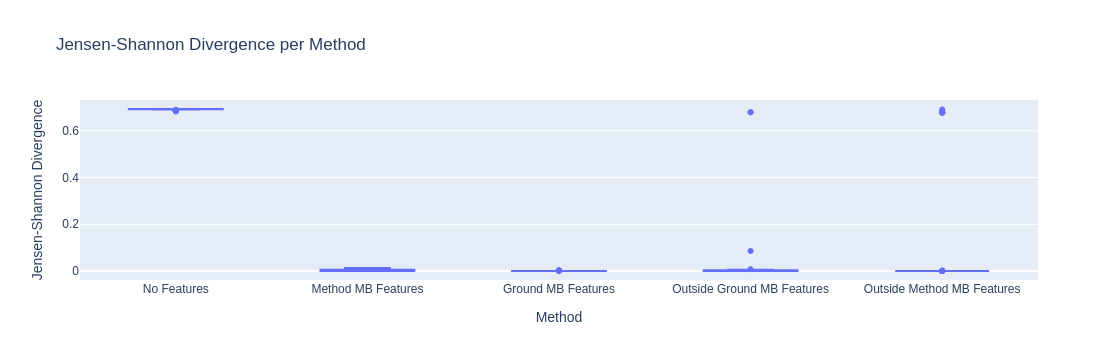

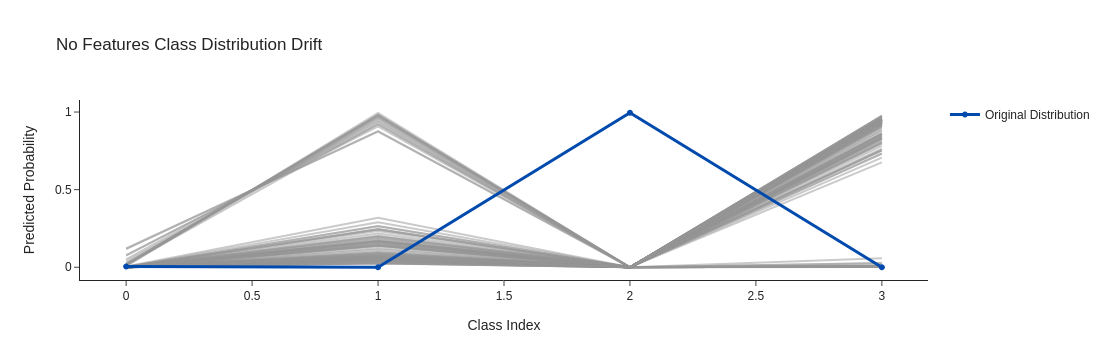

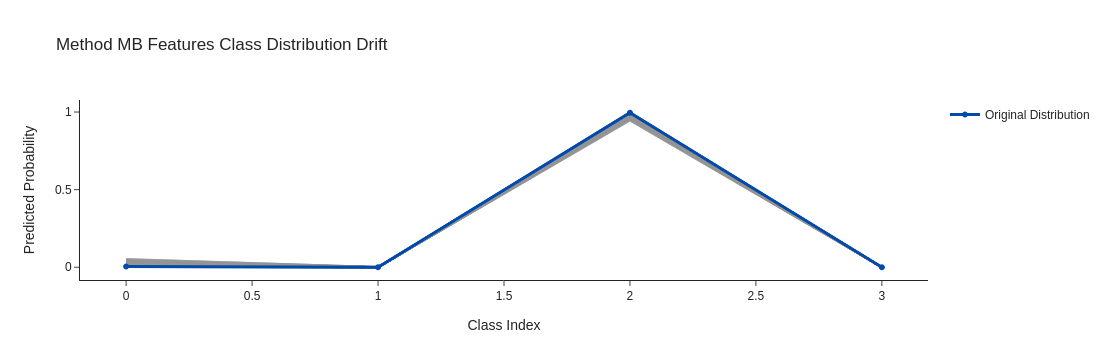

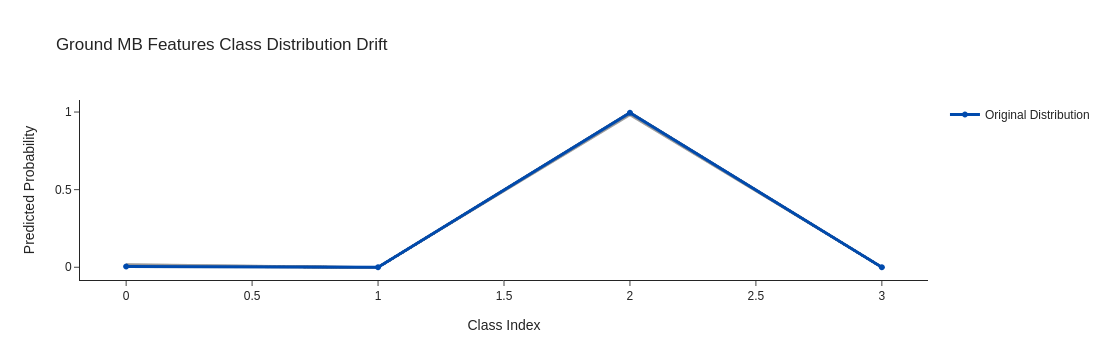

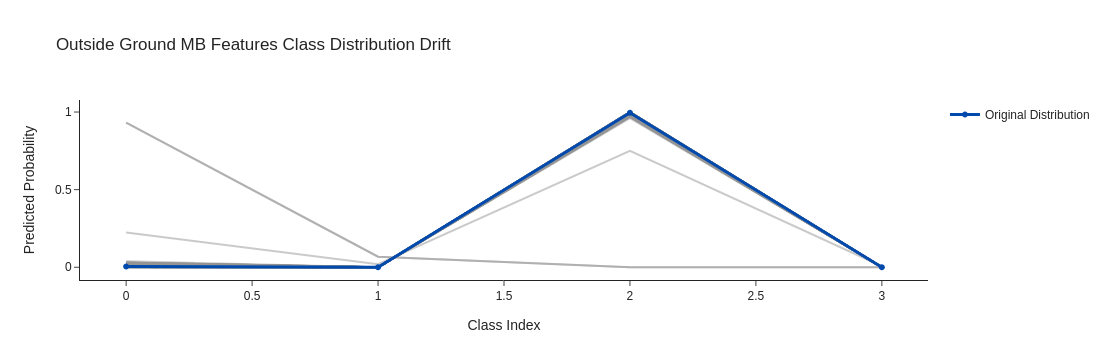

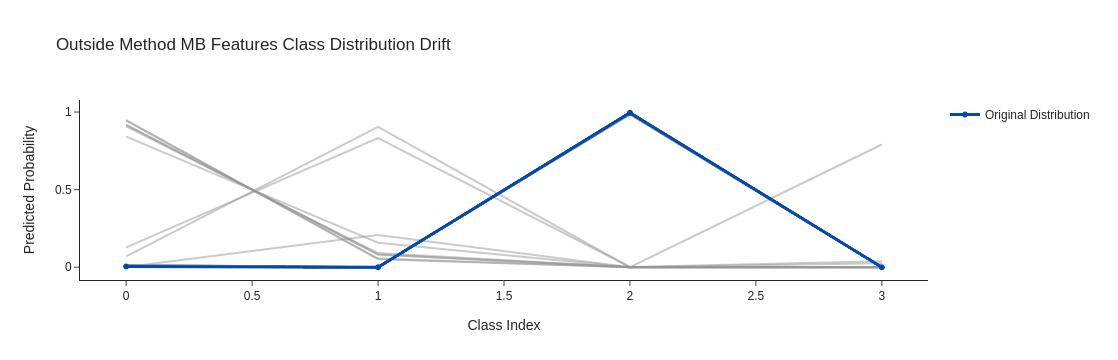

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', 'Mileage': 'C', 'RuggedAuto': 'C', 'OtherCarCost': 'C', 'ILiCost': 'C', 'AntiTheft': 'C', 'SocioEcon': 'C', 'MakeModel': 'C', 'CarValue': 'C', 'HomeBase': 'C', 'Accident': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Airbag': 'C', 'PropCost': 'C', 'Antilock': 'C', 'ThisCarCost': 'C', 'MedCost': 'C', 'Age': 'C', 'OtherCar': 'C', 'Cushioning': 'C', 'SeniorTrain': 'C', 'DrivHist': 'C', 'Theft': 'C', 'DrivingSkill': 'C', 'RiskAversion': 'C', 'ThisCarDam': 'C', 'DrivQuality': 'C', 'VehicleYear': 'C', 'GoodStudent': 'C', '

  0%|          | 0/1000000 [00:00<?, ?it/s]

= = = = = = = = = = MARKOV BLANKET RETRIEVAL RESULTS = = = = = = = = = =
Precision: 0.4 | Recall: 0.5 | F1: 0.4444444444444444 | Accuracy: 0.8469387755102041
Confusion Matrix: 
[[154  18]
 [ 12  12]]

= = = = = = = = = = FIDELITY TO MODEL = = = = = = = = = =
No Features Divergence: 0.07397858894669257
Method MB Features Divergence: 0.0006826652946477006
Ground MB Features Divergence: 0.0009709159241770706
Outside Ground MB Featues Divergence: 0.07639773530808801
Outside Method MB Features Divergence: 0.15231140493842932


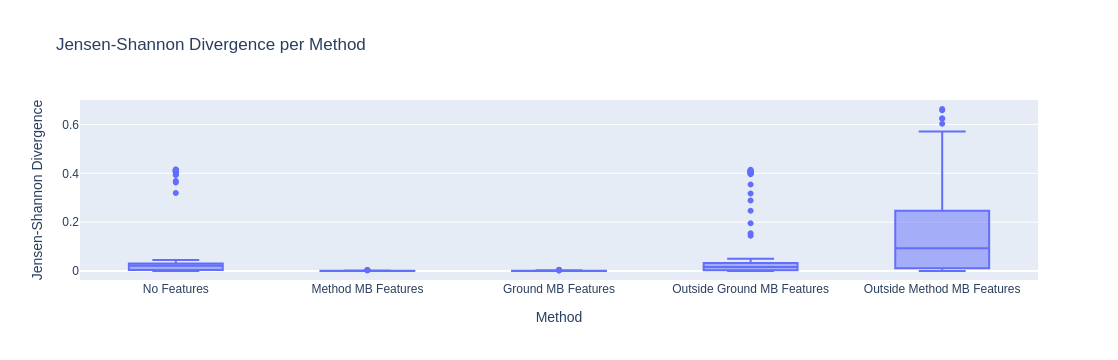

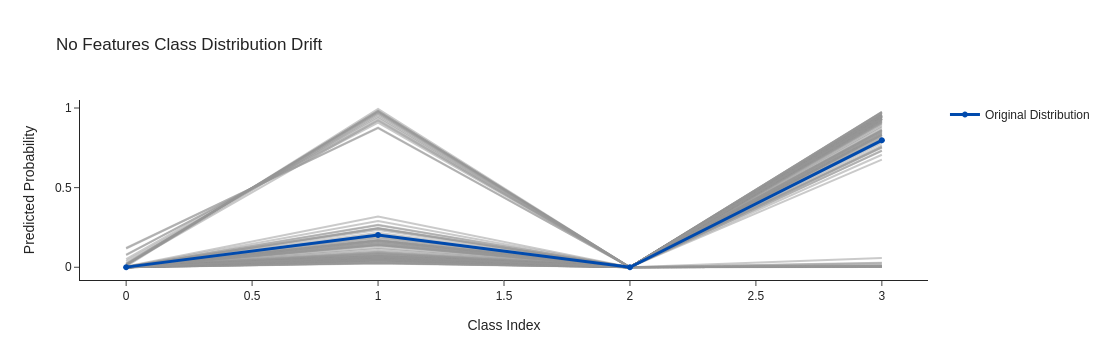

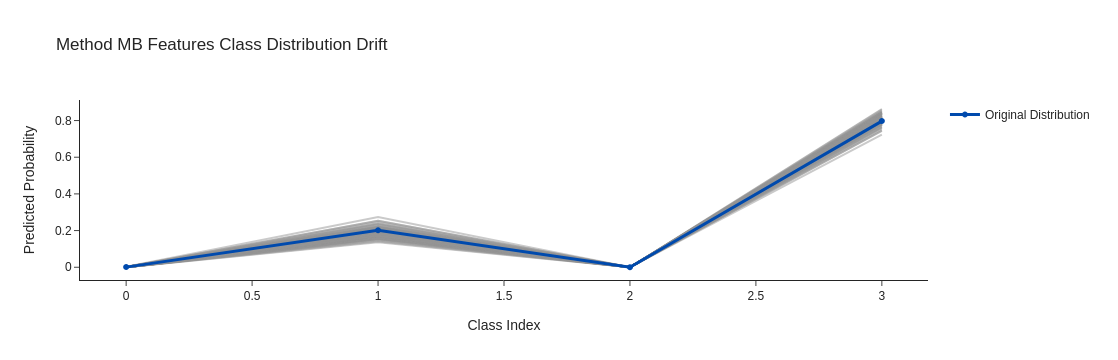

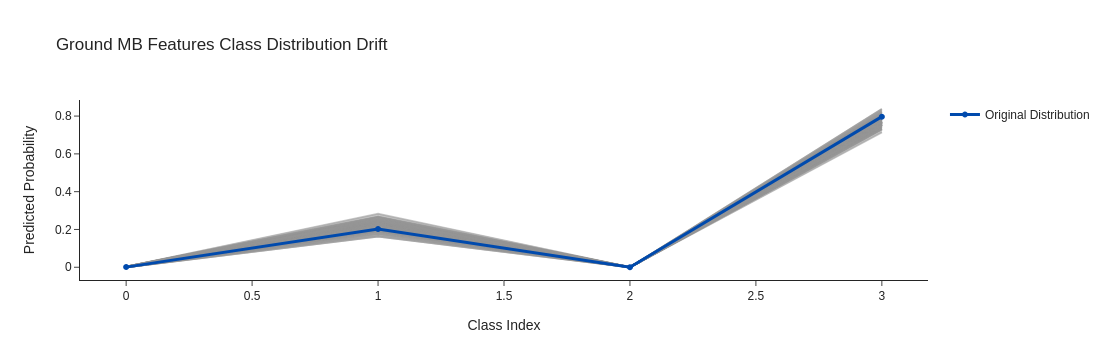

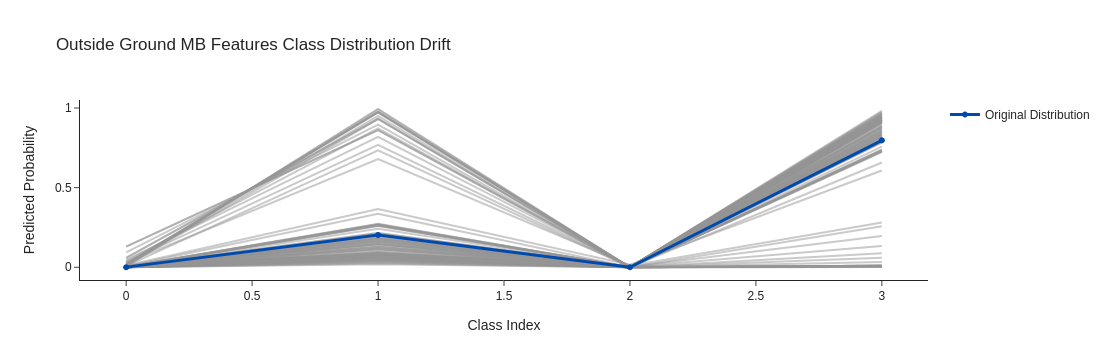

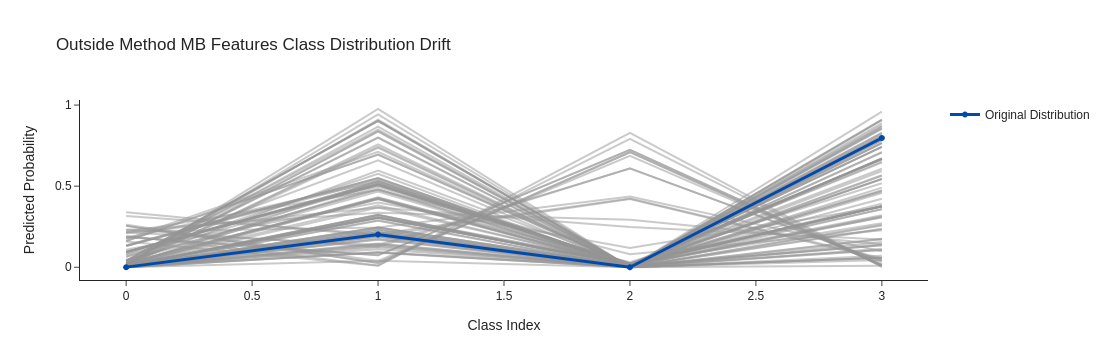

In [41]:
for _ in range(10):
    
    method = Method(
        model = model, 
        training_data = X_train, 
        feature_names = feature_names, 
        target_name = target_name, 
        n_samples = 5000, 
        rep_prob = 0.1
    )

    instance_idx = np.random.randint(X_test.shape[0])
    instance = X_test[instance_idx]
    
    method.log_data(instance)
    method.get_structure()

    precision, recall, f1, accuracy, confusion_matrix = structure_metrics(ground_mb, method.mb, variables)

    # Features to freeze while randomizing the rest
    no_features = [] # randomize all features (baseline)
    method_features = list(method.blanket) # freeze features returned from markov blanket of method
    ground_features = list(ground_mb.get_markov_blanket(target_name)) # freeze features from ground-truth markov blanket of target
    out_ground_features = [f for f in feature_names if f not in ground_features] # features outside of ground-truth markov blanket
    out_method_features = [f for f in feature_names if f not in method_features] # features outside of explainer markov blanket
    
    no_new, no_og = distribution_drift(
        instance = instance, 
        training_data = X_train, 
        feature_set = no_features, 
        feature_names = feature_names, 
        model = model, 
        n_trials = n_trials
    )
    
    method_new, method_og = distribution_drift(
        instance = instance, 
        training_data = X_train, 
        feature_set = method_features, 
        feature_names = feature_names, 
        model = model, 
        n_trials = n_trials
    )
    
    ground_new, ground_og = distribution_drift(
        instance = instance, 
        training_data = X_train, 
        feature_set = ground_features, 
        feature_names = feature_names, 
        model = model, 
        n_trials = n_trials
    )
    
    out_ground_new, out_ground_og = distribution_drift(
        instance = instance, 
        training_data = X_train, 
        feature_set = out_ground_features, 
        feature_names = feature_names, 
        model = model, 
        n_trials = n_trials
    )
    
    out_method_new, out_method_og = distribution_drift(
        instance = instance, 
        training_data = X_train, 
        feature_set = out_method_features, 
        feature_names = feature_names, 
        model = model, 
        n_trials = n_trials
    )
    
    no_avg, no_values = average_distribution_drift(no_og, no_new)
    method_avg, method_values = average_distribution_drift(method_og, method_new)
    ground_avg, ground_values = average_distribution_drift(ground_og, ground_new)
    out_ground_avg, out_ground_values = average_distribution_drift(out_ground_og, out_ground_new)
    out_method_avg, out_method_values = average_distribution_drift(out_method_og, out_method_new)
    
    js_values = np.stack((no_values, method_values, ground_values, out_ground_values, out_method_values))
    method_names = ['No Features', 'Method MB Features', 'Ground MB Features', 'Outside Ground MB Features', 'Outside Method MB Features']

    print(f'= = = = = = = = = = MARKOV BLANKET RETRIEVAL RESULTS = = = = = = = = = =')
    print(f'Precision: {precision} | Recall: {recall} | F1: {f1} | Accuracy: {accuracy}')
    print(f'Confusion Matrix: \n{confusion_matrix}\n')
    
    print(f'= = = = = = = = = = FIDELITY TO MODEL = = = = = = = = = =')
    print(f'No Features Divergence: {no_avg}')
    print(f'Method MB Features Divergence: {method_avg}')
    print(f'Ground MB Features Divergence: {ground_avg}')
    print(f'Outside Ground MB Featues Divergence: {out_ground_avg}')
    print(f'Outside Method MB Features Divergence: {out_method_avg}')
    
    results.append({

        "dataset": dataset_name,

        "target": target_name,
        "features": feature_names,
        "mlp_accuracy": float(mlp_accuracy),
        
        "method_structure": list(method.mb.edges()),
        "ground_structure": list(ground_mb.edges()),

        "precision": float(precision), 
        "recall": float(recall), 
        "f1": float(f1), 
        "accuracy": float(accuracy), 
        
        "method_features": method_features,
        "ground_features": ground_features,
        "out_ground_features": out_ground_features,
        "out_method_features": out_method_features,
        
        "no_new": no_new.tolist(),
        "method_new": method_new.tolist(),
        "ground_new": ground_new.tolist(),
        "out_ground_new": out_ground_new.tolist(),
        "out_method_new": out_method_new.tolist(),
        
        "no_og": no_og.tolist(),
        "method_og": method_og.tolist(),
        "ground_og": ground_og.tolist(),
        "out_ground_og": out_ground_og.tolist(),
        "out_method_og": out_method_og.tolist(),
        
        "no_values": list(no_values),
        "method_values": list(method_values),
        "ground_values": list(ground_values),
        "out_ground_values": list(out_ground_values),
        "out_method_values": list(out_method_values),
        
        "no_avg": float(no_avg),
        "method_avg": float(method_avg),
        "ground_avg": float(ground_avg),
        "out_ground_avg": float(out_ground_avg),
        "out_method_avg": float(out_method_avg),
    })

    with open(f'{experiment_name}.json', 'w') as f:

        json.dump(results, f, indent = 4)
    
    divergence_plot(js_values, method_names)
    
    fidelity_plot(no_new, no_og, method_names[0])
    fidelity_plot(method_new, method_og, method_names[1])
    fidelity_plot(ground_new, ground_og, method_names[2])
    fidelity_plot(out_ground_new, out_ground_og, method_names[3])
    fidelity_plot(out_method_new, out_method_og, method_names[4])